# Most Played Steam Games

In this project we go to examinate the most played games on **Steam**. Saving the information into a csv file and illustrating this proccess step by step.

## 1- Getting the data from 'https://steamdb.info/graph/' 

In [1]:
from bs4 import BeautifulSoup
import requests
from urllib.request import Request, urlopen

req = Request(
    url='https://steamdb.info/graph/', 
    headers={'User-Agent': 'XYZ/3.0'}
)
webpage = urlopen(req, timeout=10).read()

soup1=BeautifulSoup(webpage,'html.parser')


class_ext=soup1.select('.app')
l=[]
for idx,item in enumerate(class_ext):

    element = class_ext[idx].getText().split()
    l.append(element)

information=l[1:]
# There is a lot of information so i will print the first 10 elements
print(information[:10])

[['Counter-Strike:', 'Global', 'Offensive', '707,360', '935,161', '1,308,963', '+'], ['Dota', '2', '609,839', '635,461', '1,295,114', '+'], ['PUBG:', 'BATTLEGROUNDS', '251,045', '404,972', '3,257,248', '+'], ['Apex', 'Legends', '185,118', '334,609', '511,676', '+'], ['Lost', 'Ark', '130,818', '198,287', '1,325,305', '+'], ['Grand', 'Theft', 'Auto', 'V', '109,897', '136,283', '364,548', '+'], ['The', 'Sims™', '4', '75,134', '75,134', '75,134', '+'], ['Wallpaper', 'Engine', '75,119', '102,220', '114,200', '+'], ['Rust', '72,199', '82,114', '245,243', '+'], ['Destiny', '2', '68,409', '103,063', '292,513', '+']]


In [2]:
new_information_most_played=[]
for i in range(len(information)):
    information_most_played_name=" ".join(information[i][:-4])
    information_most_played_last=information[i][-4:]
    information_most_played_last.insert(0,information_most_played_name)
    new_information_most_played.append(information_most_played_last)
# There is a lot of information so i will print the first 10 elements
new_information_most_played[:10]

[['Counter-Strike: Global Offensive', '707,360', '935,161', '1,308,963', '+'],
 ['Dota 2', '609,839', '635,461', '1,295,114', '+'],
 ['PUBG: BATTLEGROUNDS', '251,045', '404,972', '3,257,248', '+'],
 ['Apex Legends', '185,118', '334,609', '511,676', '+'],
 ['Lost Ark', '130,818', '198,287', '1,325,305', '+'],
 ['Grand Theft Auto V', '109,897', '136,283', '364,548', '+'],
 ['The Sims™ 4', '75,134', '75,134', '75,134', '+'],
 ['Wallpaper Engine', '75,119', '102,220', '114,200', '+'],
 ['Rust', '72,199', '82,114', '245,243', '+'],
 ['Destiny 2', '68,409', '103,063', '292,513', '+']]

## 2- Let's make a DataFrame.

In [3]:
import pandas as pd
df_most_played=pd.DataFrame(new_information_most_played,columns=["Name","Current","Peak_24h","All time Peak","Plus"])
df_most_played

,Name,Current,Peak_24h,All time Peak,Plus
0,Counter-Strike: Global Offensive,"707,360","935,161","1,308,963",+
1,Dota 2,"609,839","635,461","1,295,114",+
2,PUBG: BATTLEGROUNDS,"251,045","404,972","3,257,248",+
3,Apex Legends,"185,118","334,609","511,676",+
4,Lost Ark,"130,818","198,287","1,325,305",+
...,...,...,...,...,...
5781,Freedom Cry,0,1,"1,000",+
5782,Escape From Nazi Labs,0,0,"1,000",+
5783,Project First Contact,0,2,"1,000",+
5784,OutSplit,0,0,"1,000",+


## 3- Drop "Plus" column

In [4]:
df_most_played.drop("Plus",axis=1,inplace=True)
df_most_played

,Name,Current,Peak_24h,All time Peak
0,Counter-Strike: Global Offensive,"707,360","935,161","1,308,963"
1,Dota 2,"609,839","635,461","1,295,114"
2,PUBG: BATTLEGROUNDS,"251,045","404,972","3,257,248"
3,Apex Legends,"185,118","334,609","511,676"
4,Lost Ark,"130,818","198,287","1,325,305"
...,...,...,...,...
5781,Freedom Cry,0,1,"1,000"
5782,Escape From Nazi Labs,0,0,"1,000"
5783,Project First Contact,0,2,"1,000"
5784,OutSplit,0,0,"1,000"


## 4-  Analizing the information

### Checking the type of each column

In [5]:
df_most_played.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5786 non-null   object
 1   Current        5786 non-null   object
 2   Peak_24h       5786 non-null   object
 3   All time Peak  5786 non-null   object
dtypes: object(4)
memory usage: 180.9+ KB


Let's remove "," character from Players Now and Peak Today columns to convert them values as numeric

In [6]:
df_most_played["Current"]=df_most_played["Current"].str.replace(",","")
df_most_played["Peak_24h"]=df_most_played["Peak_24h"].str.replace(",","")
df_most_played["All time Peak"]=df_most_played["All time Peak"].str.replace(",","")

### Transforming the type of "Current", "Peak_24h" and "All time Peak" columns to integer

In [7]:
df_most_played["Current"]=df_most_played["Current"].astype(int)
df_most_played["Peak_24h"]=df_most_played["Peak_24h"].astype(int)
df_most_played["All time Peak"]=df_most_played["All time Peak"].astype(int)
df_most_played.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           5786 non-null   object
 1   Current        5786 non-null   int32 
 2   Peak_24h       5786 non-null   int32 
 3   All time Peak  5786 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 113.1+ KB


In [8]:
df_most_played.describe()

,Current,Peak_24h,All time Peak
count,5786.000000,5786.000000,5.786000e+03
mean,996.743000,1270.354303,1.150071e+04
std,13655.964961,17324.987698,6.457459e+04
min,0.000000,0.000000,6.500000e+01
25%,0.000000,2.000000,1.322250e+03
50%,30.000000,48.000000,2.305000e+03
75%,149.750000,202.000000,5.599500e+03
max,707360.000000,935161.000000,3.257248e+06


## 5- Saving the dataframe into a csv file

In [9]:
df_most_played.to_csv("MOST_PLAYED_GAMES_IN_STEAM.csv",index=None)

In [10]:
df_most_played_most_all_time_peak=df_most_played.sort_values("All time Peak",ascending=False)
df_most_played_most_all_time_peak_10=df_most_played_most_all_time_peak[["Name","All time Peak"]].head(10)
df_most_played_most_all_time_peak_10

,Name,All time Peak
2,PUBG: BATTLEGROUNDS,3257248
4,Lost Ark,1325305
0,Counter-Strike: Global Offensive,1308963
1,Dota 2,1295114
17,Cyberpunk 2077,1054388
31,ELDEN RING,953426
13,New World,913634
3,Apex Legends,511676
74,Valheim,502387
12,Terraria,489886


## Let's build some charts to illustrate the data

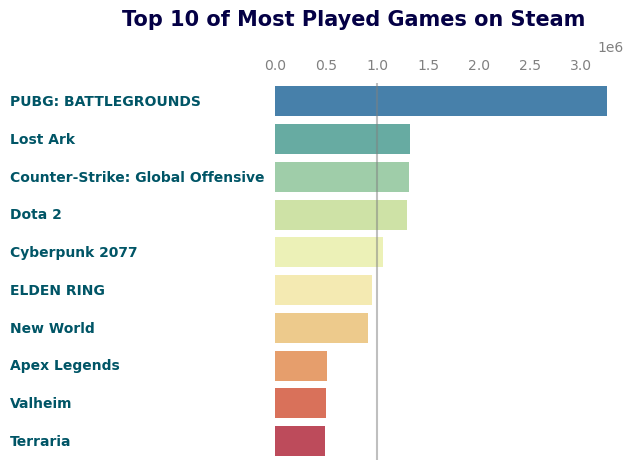

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax =plt.subplots(figsize=(4.5,5),dpi=100)
ax.text(x=-1500000,y=-2,s='Top 10 of Most Played Games on Steam',weight='bold',size=15,color="#040045")
sns.barplot(x = 'All time Peak', y = 'Name', data = df_most_played_most_all_time_peak_10, palette='Spectral_r')
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.set(xlabel=None,ylabel=None)
ax.xaxis.tick_top()
ax.tick_params(top=False,left=False)
ax.tick_params(axis='x',colors='grey')
ax.set_yticks([])
names_models=df_most_played_most_all_time_peak_10["Name"]
for i,models in zip(range(16),names_models):
    ax.text(x=-2600000,y=i+0.12,s=models,fontweight="bold",color="#005566",alpha=1)
ax.axvline(x=1000000,ymin=0,ymax=1,c='grey',alpha=0.5)
ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('w')
plt.show()

In [12]:
df_most_played_most_all_time_peak_Peak_24h=df_most_played.sort_values("Peak_24h",ascending=False)
df_most_played_most_all_time_peak_Peak_24h_10=df_most_played_most_all_time_peak_Peak_24h[["Name","Peak_24h"]].head(10)
df_most_played_most_all_time_peak_Peak_24h_10

,Name,Peak_24h
0,Counter-Strike: Global Offensive,935161
1,Dota 2,635461
2,PUBG: BATTLEGROUNDS,404972
3,Apex Legends,334609
4,Lost Ark,198287
5,Grand Theft Auto V,136283
18,NARAKA: BLADEPOINT,120385
9,Destiny 2,103063
7,Wallpaper Engine,102220
10,Team Fortress 2,82576


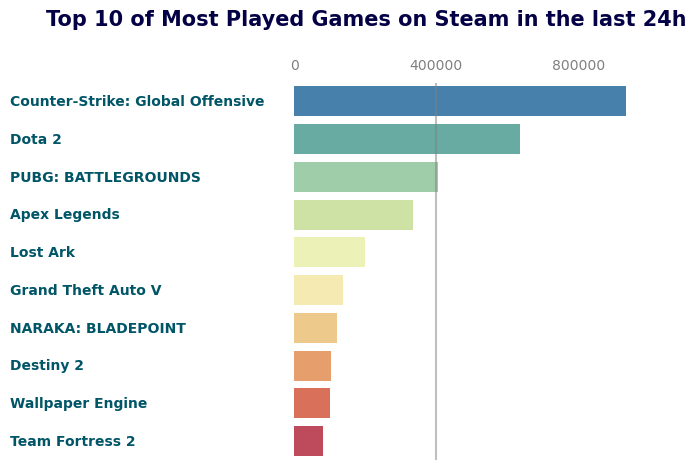

In [13]:
fig,ax =plt.subplots(figsize=(4.5,5),dpi=100)
ax.text(x=-700000,y=-2,s='Top 10 of Most Played Games on Steam in the last 24h',weight='bold',size=15,color="#040045")
sns.barplot(x = 'Peak_24h', y = 'Name', data = df_most_played_most_all_time_peak_Peak_24h_10, palette='Spectral_r')
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.set(xlabel=None,ylabel=None)
ax.xaxis.tick_top()
ax.set_xticks([0,400000,800000])
ax.tick_params(top=False,left=False)
ax.tick_params(axis='x',colors='grey')
ax.set_yticks([])
names_models=df_most_played_most_all_time_peak_Peak_24h_10["Name"]
for i,models in zip(range(16),names_models):
    ax.text(x=-800000,y=i+0.12,s=models,fontweight="bold",color="#005566",alpha=1)
ax.axvline(x=400000,ymin=0,ymax=1,c='grey',alpha=0.5)
ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('w')
plt.show()

In [14]:
df_most_played_most_all_time_peak_Peak_current=df_most_played.sort_values("Current",ascending=False)
df_most_played_most_all_time_peak_Peak_current_10=df_most_played_most_all_time_peak_Peak_current[["Name","Current"]].head(10)
df_most_played_most_all_time_peak_Peak_current_10

,Name,Current
0,Counter-Strike: Global Offensive,707360
1,Dota 2,609839
2,PUBG: BATTLEGROUNDS,251045
3,Apex Legends,185118
4,Lost Ark,130818
5,Grand Theft Auto V,109897
6,The Sims™ 4,75134
7,Wallpaper Engine,75119
8,Rust,72199
9,Destiny 2,68409


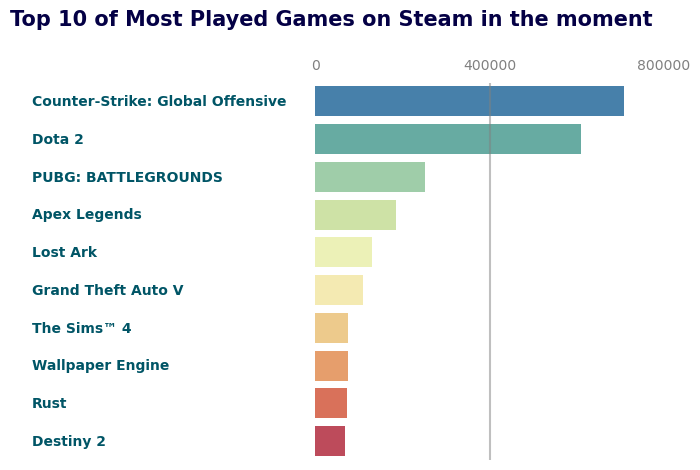

In [15]:
fig,ax =plt.subplots(figsize=(4.5,5),dpi=100)
ax.text(x=-700000,y=-2,s='Top 10 of Most Played Games on Steam in the moment',weight='bold',size=15,color="#040045")
sns.barplot(x = 'Current', y = 'Name', data = df_most_played_most_all_time_peak_Peak_current_10, palette='Spectral_r')
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.set(xlabel=None,ylabel=None)
ax.xaxis.tick_top()
ax.set_xticks([0,400000,800000])
ax.tick_params(top=False,left=False)
ax.tick_params(axis='x',colors='grey')
ax.set_yticks([])
names_models=df_most_played_most_all_time_peak_Peak_current_10["Name"]
for i,models in zip(range(16),names_models):
    ax.text(x=-650000,y=i+0.12,s=models,fontweight="bold",color="#005566",alpha=1)
ax.axvline(x=400000,ymin=0,ymax=1,c='grey',alpha=0.5)
ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('w')
plt.show()